In [ ]:
import json
def is_number(s):
  if s.isnumeric() or s.isdigit():
    return True
  try:
      float(s)
      return True
  except ValueError:
      return False

with open('default_pred.json') as f:
  predict_result = json.load(f)

with open('val.json') as f1:
  val_info = json.load(f1)

import collections

result = {}
for qa in val_info:
  new_qa = {}
  new_qa["question_id"] = qa["image"]
  new_qa["sent"] = qa["question"]
  answers = []
  for ans in qa["answers"]:
    answers.append(ans["answer"])
  ans_cnt = collections.Counter(answers)
  label = {}
  for ans,cnt in ans_cnt.items():
    score = 0.3 if cnt == 1 else 0.6 if cnt ==2 else 0.9 if cnt ==3 else 1
    label[ans] = score
  new_qa["label"] = label
  result[new_qa["question_id"]] = new_qa
val_info = result




      # {
    #     "img_id":"VizWiz_val_000000028037",
    #     "label":{
    #         "72":1,
    #         "72 degrees":0.3
    #     },
    #     "question_id":"VizWiz_val_000000028037.jpg",
    #     "sent":"What temperature is the thermostat set to?",
    #     "answer":"unanswerable"
    # }

binary_qa = [] #3answers
nonanswerable_qa = [] #3answers
number_qa = []#3answers
all_qa = []

for qa in predict_result:
  info = val_info.get(qa["image"])
  info["answer"] = qa["answer"]
  all_qa.append(info)
  labels = info["label"].keys()
  if ("yes" in labels and info["label"]["yes"] >= 0.9) or ("no" in labels and info["label"]["no"] >= 0.9):
    binary_qa.append(info)
  if "unanswerable" in labels and info["label"]["unanswerable"] >= 0.9:
    nonanswerable_qa.append(info)
  for label in labels:
    if is_number(label) and info["label"][label] >= 0.9:
      number_qa.append(info)
      break



In [ ]:
print(len(all_qa))
print(len(binary_qa))
print(len(nonanswerable_qa))
print(len(number_qa))
with open('all_qa_pred_result.json', 'w') as outfile:
    json.dump(all_qa, outfile)
with open('binary_qa_pred_result.json', 'w') as outfile:
    json.dump(binary_qa, outfile)
with open('nonanswerable_qa_pred_result.json', 'w') as outfile:
    json.dump(nonanswerable_qa, outfile)
with open('number_qa_pred_result.json', 'w') as outfile:
    json.dump(number_qa, outfile)

4319
274
1105
71


In [ ]:
binary_qa_pred_wrong = []
for qa in binary_qa:
  popular_labels = []
  max_score = 0
  for label,score in qa["label"].items():
    if score > max_score:
      popular_labels = [label]
      max_score = score
    elif score == max_score:
      popular_labels.append(label)

  if qa["answer"] not in popular_labels:
    binary_qa_pred_wrong.append(qa)
with open('binary_qa_pred_wrong.json', 'w') as outfile:
    json.dump(binary_qa_pred_wrong, outfile) 
print("binary wrong" + str(len(binary_qa_pred_wrong) / len(binary_qa)))


all_qa_pred_wrong = []
for qa in all_qa:
  popular_labels = []
  max_score = 0
  for label,score in qa["label"].items():
    if score > max_score:
      popular_labels = [label]
      max_score = score
    elif score == max_score:
      popular_labels.append(label)

  if qa["answer"] not in popular_labels:
    all_qa_pred_wrong.append(qa)
with open('all_qa_pred_wrong.json', 'w') as outfile:
    json.dump(all_qa_pred_wrong, outfile) 

print("all_qa_pred_wrong" + str(len(all_qa_pred_wrong) / len(all_qa)))

nonanswerable_qa_pred_wrong = []
for qa in nonanswerable_qa:
  popular_labels = []
  max_score = 0
  for label,score in qa["label"].items():
    if score > max_score:
      popular_labels = [label]
      max_score = score
    elif score == max_score:
      popular_labels.append(label)

  if qa["answer"] not in popular_labels:
    nonanswerable_qa_pred_wrong.append(qa)
with open('nonanswerable_qa_pred_wrong.json', 'w') as outfile:
    json.dump(nonanswerable_qa_pred_wrong, outfile) 

print("nonanswerable_qa_pred_wrong" + str(len(nonanswerable_qa_pred_wrong) / len(nonanswerable_qa)))


number_qa_pred_wrong = []
for qa in number_qa:
  popular_labels = []
  max_score = 0
  for label,score in qa["label"].items():
    if score > max_score:
      popular_labels = [label]
      max_score = score
    elif score == max_score:
      popular_labels.append(label)

  if qa["answer"] not in popular_labels:
    number_qa_pred_wrong.append(qa)
with open('number_qa_pred_wrong.json', 'w') as outfile:
    json.dump(number_qa_pred_wrong, outfile) 
print("number_qa_pred_wrong" + str(len(number_qa_pred_wrong) / len(number_qa)))


binary wrong0.4708029197080292
all_qa_pred_wrong0.6056957629080806
nonanswerable_qa_pred_wrong0.28778280542986423
number_qa_pred_wrong0.8450704225352113


In [ ]:
#accuracy recalculate
all_qa_pred_result = all_qa

total_score = 0
for qa in all_qa_pred_result:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    if score == 0.3:
      total_score += 1.0/3
    elif score == 0.6:
      total_score += 2.0/3
    elif score >= 0.9:
      total_score += 1.0
print("acc for all is " + str(total_score/len(all_qa_pred_result)))

binary_qa_pred_result = binary_qa
total_score = 0
for qa in binary_qa_pred_result:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    if score == 0.3:
      total_score += 1.0/3
    elif score == 0.6:
      total_score += 2.0/3
    elif score >= 0.9:
      total_score += 1.0
print("acc for binary is " + str(total_score/len(binary_qa_pred_result)))

nonanswerable_qa_pred_result = nonanswerable_qa
total_score = 0
for qa in nonanswerable_qa_pred_result:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    if score == 0.3:
      total_score += 1.0/3
    elif score == 0.6:
      total_score += 2.0/3
    elif score >= 0.9:
      total_score += 1.0
print("acc for nonanswerable is " + str(total_score/len(nonanswerable_qa_pred_result)))

number_qa_pred_result = number_qa
total_score = 0
for qa in number_qa_pred_result:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    if score == 0.3:
      total_score += 1.0/3
    elif score == 0.6:
      total_score += 2.0/3
    elif score >= 0.9:
      total_score += 1.0
print("acc for number is " + str(total_score/len(number_qa_pred_result)))

acc for all is 0.4896966890483908
acc for binary is 0.6642335766423361
acc for nonanswerable is 0.8301659125188539
acc for number is 0.3004694835680751


In [ ]:
print("all prediction cnt: " + str(len(all_qa_pred_result)))
print("all binary qa cnt: " + str(len(binary_qa_pred_result)))
print("all nonanswerable qa cnt: " + str(len(nonanswerable_qa_pred_result)))
print("all number qa cnt: " + str(len(number_qa_pred_result)))

all prediction cnt: 4319
all binary qa cnt: 274
all nonanswerable qa cnt: 1105
all number qa cnt: 71


In [ ]:
#edit distance
!pip install python-Levenshtein
from Levenshtein import distance

total_dist = 0
for qa in all_qa_pred_result:
  answer = qa["answer"]
  three = []
  six = []
  nine = []
  ones = []
  for label,score in qa["label"].items():
    dist = distance(answer,label)
    if score == 0.3:
      three.append(dist)
    elif score == 0.6:
      six.append(dist)
    elif score == 0.9:
      nine.append(dist)
    else:
      ones.append(dist)
  dist = sum(three) + sum(six)*2 + sum(nine)*3 +( (10-(len(three) + len(six) + len(nine)))/len(ones)*sum(ones) if len(ones) > 0 else 0)
  total_dist += (dist/10)
print("ave edit dist for all : " + str(total_dist/len(all_qa_pred_result)))

#binary
total_dist = 0
for qa in binary_qa_pred_result:
  answer = qa["answer"]
  three = []
  six = []
  nine = []
  ones = []
  for label,score in qa["label"].items():
    dist = distance(answer,label)
    if score == 0.3:
      three.append(dist)
    elif score == 0.6:
      six.append(dist)
    elif score == 0.9:
      nine.append(dist)
    else:
      ones.append(dist)
  dist = sum(three) + sum(six)*2 + sum(nine)*3 +( (10-(len(three) + len(six) + len(nine)))/len(ones)*sum(ones) if len(ones) > 0 else 0)
  total_dist += (dist/10)

print("ave edit dist for binary : " + str(total_dist/len(binary_qa_pred_result)))

#unanswerable
total_dist = 0
for qa in nonanswerable_qa_pred_result:
  answer = qa["answer"]
  three = []
  six = []
  nine = []
  ones = []
  for label,score in qa["label"].items():
    dist = distance(answer,label)
    if score == 0.3:
      three.append(dist)
    elif score == 0.6:
      six.append(dist)
    elif score == 0.9:
      nine.append(dist)
    else:
      ones.append(dist)
  dist = sum(three) + sum(six)*2 + sum(nine)*3 +( (10-(len(three) + len(six) + len(nine)))/len(ones)*sum(ones) if len(ones) > 0 else 0)
  total_dist += (dist/10)
print("ave edit dist for nonanswerable : " + str(total_dist/len(nonanswerable_qa_pred_result)))

#number
total_dist = 0
for qa in number_qa_pred_result:
  answer = qa["answer"]
  three = []
  six = []
  nine = []
  ones = []
  for label,score in qa["label"].items():
    dist = distance(answer,label)
    if score == 0.3:
      three.append(dist)
    elif score == 0.6:
      six.append(dist)
    elif score == 0.9:
      nine.append(dist)
    else:
      ones.append(dist)
  dist = sum(three) + sum(six)*2 + sum(nine)*3 +( (10-(len(three) + len(six) + len(nine)))/len(ones)*sum(ones) if len(ones) > 0 else 0)
  total_dist += (dist/10)

print("ave edit dist for number : " + str(total_dist/len(number_qa_pred_result)))

     |████████████████████████████████| 51kB 2.9MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149818 sha256=c58d520defec4a782dde5c69a66e59b02d1ca2e1ce2235c15a36aa8b7175e0b4
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein
ave edit dist for all : 9.047406807131274
ave edit dist for binary : 7.141970802919717
ave edit dist for nonanswerable : 6.415610859728504
ave edit dist for number : 8.641549295774645


total number of binary qa predicted wrong is : 129
number of workers vote for the wrong answer distribution: {1: 34, 0: 65, 3: 17, 2: 13}


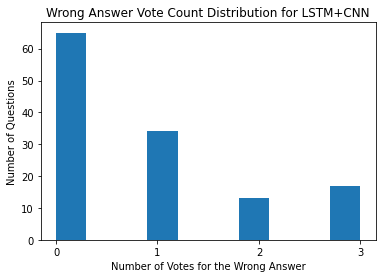

yes/no predicted opposite percentage: 0.31007751937984496
percentage of answer equals to unanswerable : 0.5038759689922481
percentage of questions starts with can you : 0.1937984496124031
percentage of questions contains but : 0.031007751937984496
question length distribution: {49: 2, 17: 2, 38: 2, 131: 1, 15: 3, 45: 3, 64: 1, 95: 1, 75: 1, 60: 1, 30: 2, 24: 4, 126: 2, 113: 1, 106: 1, 97: 1, 72: 3, 44: 2, 26: 6, 79: 1, 58: 2, 29: 2, 117: 2, 105: 1, 40: 2, 77: 1, 83: 1, 39: 2, 50: 1, 51: 2, 86: 1, 43: 2, 108: 1, 142: 2, 28: 4, 87: 1, 55: 3, 42: 3, 36: 3, 52: 1, 31: 2, 73: 1, 70: 2, 76: 1, 10: 1, 32: 2, 84: 1, 34: 2, 25: 3, 63: 1, 19: 3, 27: 4, 37: 1, 13: 3, 96: 1, 74: 3, 35: 2, 33: 1, 69: 1, 22: 1, 23: 3, 14: 2, 157: 1, 41: 2, 46: 1, 16: 2, 71: 1, 20: 1, 123: 1, 66: 1, 85: 1}
max len: 157, min len: 10, ave len: 50.542635658914726


In [ ]:
#details for binary qa
binary_qa_wrong_cnt = len(binary_qa_pred_wrong)
print("total number of binary qa predicted wrong is : " + str(binary_qa_wrong_cnt))



#wrong answer vote distribution
d = {}
cnt = []
for qa in binary_qa_pred_wrong:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    num_votes = 1 if score == 0.3 else 2 if score == 0.6 else 3 if score == 0.9 else 4
    d[num_votes] = d.get(num_votes,0)+1
    cnt.append(num_votes)
  else:
    d[0] = d.get(0,0)+1
    cnt.append(0)
print("number of workers vote for the wrong answer distribution: " + str(d))

import matplotlib.pyplot as plt
import numpy as np
plt.hist(cnt)
bars = ('0','1','2','3')
x_pos = np.arange(len(bars))
plt.title('Wrong Answer Vote Count Distribution for LSTM+CNN')
plt.xlabel('Number of Votes for the Wrong Answer')
plt.ylabel('Number of Questions')
plt.xticks(x_pos, bars)
plt.show()


#yes no swap
yes_no_swap_cnt = 0
ave_score_for_wrong_ans = 0
for qa in binary_qa_pred_wrong:
  if qa["answer"] in ["yes","no"]:
    yes_no_swap_cnt += 1
    ave_score_for_wrong_ans += qa["label"][qa["answer"]] if qa["answer"] in qa["label"].keys() else 0
print("yes/no predicted opposite percentage: " + str(yes_no_swap_cnt/binary_qa_wrong_cnt))

#unanswerable_cnt
unanswerable_cnt = 0
for qa in binary_qa_pred_wrong:
  if qa["answer"] == "unanswerable":
    unanswerable_cnt += 1
print("percentage of answer equals to unanswerable : " + str(unanswerable_cnt/binary_qa_wrong_cnt))

#question starts with can you see / can you tell
can_you_see_cnt = 0
for qa in binary_qa_pred_wrong:
  if qa["sent"].lower().startswith("can you see"):
    can_you_see_cnt += 1
can_you_tell_cnt = 0
for qa in binary_qa_pred_wrong:
  if qa["sent"].lower().startswith("can you tell"):
    can_you_tell_cnt += 1
can_you_cnt = 0
for qa in binary_qa_pred_wrong:
  if qa["sent"].lower().startswith("can you"):
    can_you_cnt += 1
print("percentage of questions starts with can you : " + str(can_you_cnt/binary_qa_wrong_cnt))

#question contains but: "I know this is suntan lotion, but I was wondering which factor it is, if you can see, please."
but_cnt = 0
for qa in binary_qa_pred_wrong:
  if "but" in qa["sent"].lower():
    but_cnt += 1
print("percentage of questions contains but : " + str(but_cnt/binary_qa_wrong_cnt))

#question length analysis
question_length = {}
max_len = 0
ave_len = 0
min_len = 1000000
for qa in binary_qa_pred_wrong:
  q_len = len(qa["sent"])
  question_length[q_len] = question_length.get(q_len,0) + 1
  max_len = max(max_len,q_len)
  ave_len += q_len
  min_len = min(min_len,q_len)
print("question length distribution: " + str(question_length))
ave_len /=len(binary_qa_pred_wrong)
print("max len: {}, min len: {}, ave len: {}".format(max_len,min_len,ave_len))


total number of number qa predicted wrong is : 60
number of workers vote for the wrong answer distribution: {2: 11, 0: 42, 1: 6, 3: 1}


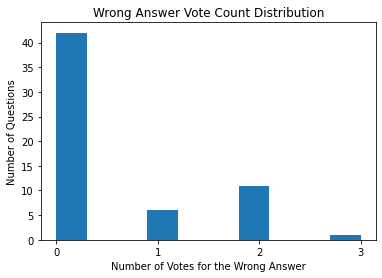

percentage of answers not number: 0.7666666666666667
percentage of answer equals to unanswerable : 0.6
question length distribution: {23: 2, 86: 1, 24: 2, 114: 1, 50: 1, 113: 1, 22: 1, 42: 2, 28: 1, 37: 3, 62: 1, 29: 2, 47: 1, 93: 2, 46: 2, 40: 4, 17: 2, 52: 1, 30: 1, 53: 1, 31: 3, 21: 1, 25: 2, 18: 1, 9: 1, 36: 1, 43: 1, 73: 1, 34: 1, 26: 1, 89: 1, 129: 1, 45: 1, 39: 1, 27: 2, 44: 2, 59: 1, 41: 2, 38: 1, 69: 1, 20: 1, 19: 1}
max len: 129, min len: 9, ave len: 43.5
percentage of questions contains but : 0.05
percentage of questions starts with can you : 0.1


In [ ]:
def is_number(s):
  if s.isnumeric() or s.isdigit():
    return True
  try:
      float(s)
      return True
  except ValueError:
      return False

#details for number_qa
number_qa_wrong_cnt = len(number_qa_pred_wrong)
print("total number of number qa predicted wrong is : " + str(number_qa_wrong_cnt))


d = {}
cnt = []
for qa in number_qa_pred_wrong:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    num_votes = 1 if score == 0.3 else 2 if score == 0.6 else 3 if score == 0.9 else 4
    d[num_votes] = d.get(num_votes,0)+1
    cnt.append(num_votes)
  else:
    d[0] = d.get(0,0)+1
    cnt.append(0)
print("number of workers vote for the wrong answer distribution: " + str(d))

plt.hist(cnt)
bars = ('0','1','2','3')
x_pos = np.arange(len(bars))
plt.title('Wrong Answer Vote Count Distribution')
plt.xlabel('Number of Votes for the Wrong Answer')
plt.ylabel('Number of Questions')
plt.xticks(x_pos, bars)
plt.show()

#answer not number cnt
ans_not_num_cnt = 0
for qa in number_qa_pred_wrong:
  if not is_number(qa["answer"]):
    ans_not_num_cnt += 1
print("percentage of answers not number: " + str(ans_not_num_cnt/number_qa_wrong_cnt))

#unanswerable_cnt
unanswerable_cnt = 0
for qa in number_qa_pred_wrong:
  if qa["answer"] == "unanswerable":
    unanswerable_cnt += 1
print("percentage of answer equals to unanswerable : " + str(unanswerable_cnt/number_qa_wrong_cnt))

max_len = 0
ave_len = 0
min_len = 1000000
#question length analysis
question_length = {}
for qa in number_qa_pred_wrong:
  q_len = len(qa["sent"])
  max_len = max(max_len,q_len)
  ave_len += q_len
  min_len = min(min_len,q_len)
  question_length[q_len] = question_length.get(q_len,0) + 1
print("question length distribution: " + str(question_length))
ave_len /=len(number_qa_pred_wrong)
print("max len: {}, min len: {}, ave len: {}".format(max_len,min_len,ave_len))

#question contains but: "I know this is suntan lotion, but I was wondering which factor it is, if you can see, please."
but_cnt = 0
for qa in number_qa_pred_wrong:
  if "but" in qa["sent"].lower():
    but_cnt += 1
print("percentage of questions contains but : " + str(but_cnt/number_qa_wrong_cnt))

can_you_cnt = 0
for qa in number_qa_pred_wrong:
  if qa["sent"].lower().startswith("can you"):
    can_you_cnt += 1
print("percentage of questions starts with can you : " + str(can_you_cnt/number_qa_wrong_cnt))


In [ ]:
#details for unanswerable
nonanswerable_qa_wrong_cnt = len(nonanswerable_qa_pred_wrong)
print("total number of unanswerable qa predicted wrong is : " + str(nonanswerable_qa_wrong_cnt))

#wrong answer vote distribution
d = {}
cnt = []
for qa in nonanswerable_qa_pred_wrong:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    num_votes = 1 if score == 0.3 else 2 if score == 0.6 else 3 if score == 0.9 else 4
    d[num_votes] = d.get(num_votes,0)+1
    cnt.append(num_votes)
  else:
    d[0] = d.get(0,0)+1
    cnt.append(0)
print("number of workers vote for the wrong answer distribution: " + str(d))

plt.hist(cnt)
bars = ('0','1','2','3')
x_pos = np.arange(len(bars))
plt.title('Wrong Answer Vote Count Distribution for LSTM+CNN')
plt.xlabel('Number of Votes for the Wrong Answer')
plt.ylabel('Number of Questions')
plt.xticks(x_pos, bars)
plt.show()

#binary
binary_answer_cnt = 0
for qa in nonanswerable_qa_pred_wrong:
  if qa["answer"] in ["yes","no"]:
    binary_answer_cnt += 1
print("output answer is binary percentage: " + str(binary_answer_cnt/nonanswerable_qa_wrong_cnt))

#number
number_answer_cnt = 0
for qa in nonanswerable_qa_pred_wrong:
  if is_number(qa["answer"]):
    number_answer_cnt += 1
print("output answer is number percentage: " + str(number_answer_cnt/nonanswerable_qa_wrong_cnt))


#question length analysis
max_len = 0
ave_len = 0
min_len = 1000000
question_length = {}
for qa in nonanswerable_qa_pred_wrong:
  q_len = len(qa["sent"])
  max_len = max(max_len,q_len)
  ave_len += q_len
  min_len = min(min_len,q_len)
  question_length[q_len] = question_length.get(q_len,0) + 1
print("question length distribution: " + str(question_length))
ave_len /=len(number_qa_pred_wrong)
print("max len: {}, min len: {}, ave len: {}".format(max_len,min_len,ave_len))

#question contains but: "I know this is suntan lotion, but I was wondering which factor it is, if you can see, please."
but_cnt = 0
for qa in nonanswerable_qa_pred_wrong:
  if "but" in qa["sent"].lower():
    but_cnt += 1
print("percentage of questions contains but : " + str(but_cnt/nonanswerable_qa_wrong_cnt))


can_you_cnt = 0
for qa in nonanswerable_qa_pred_wrong:
  if qa["sent"].lower().startswith("can you"):
    can_you_cnt += 1
print("percentage of questions starts with can you : " + str(can_you_cnt/nonanswerable_qa_wrong_cnt))

NameError: ignored